In [1]:
using Printf, DelimitedFiles
using Plots
using DataFrames
using Revise, MDToolbox

In [2]:
#using BSON: @save, @load
#@load "df.bson" df

In [3]:
using JLD2

df = load("df.jld2")["df"]

Row,fnames,score,omega,phi,prou,d,struc
,Any,Any,Any,Any,Any,Any,Any
1,1/complex.1.pdb,986.974,"[-0.356917, -0.824965, -0.438227]",81.7263,"[88.2692, -72.4848, 64.5618]",-31.825,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 112.08 18.12 98.36 |"
2,1/complex.2.pdb,982.884,"[0.0686623, -0.995647, 0.0630238]",177.85,"[113.11, 14.442, 104.925]",-0.692541,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 131.95 -14.84 108.30 |"
3,1/complex.3.pdb,962.178,"[-0.328547, 0.882951, -0.335343]",129.578,"[68.673, 48.0899, 59.3385]",-29.4352,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 118.05 -52.66 82.45 |"
4,1/complex.4.pdb,940.885,"[-0.322728, -0.924926, 0.200894]",84.9772,"[99.9138, -16.8225, 83.0557]",-16.4955,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 83.55 0.05 81.92 |"
5,1/complex.5.pdb,937.892,"[-0.052929, 0.218289, 0.974448]",99.5387,"[117.498, -69.8142, 22.0214]",-16.2941,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 83.85 -72.13 99.42 |"
6,1/complex.6.pdb,919.653,"[0.288118, 0.0219858, 0.957343]",75.2528,"[81.7794, -53.1156, -23.3921]",-19.8376,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 78.19 -62.68 91.28 |"
7,1/complex.7.pdb,919.264,"[-0.373651, 0.798232, -0.472451]",144.723,"[59.4401, 51.316, 39.6914]",-29.008,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 117.81 -57.96 83.62 |"
8,1/complex.8.pdb,914.768,"[0.312959, 0.256981, 0.91434]",76.8921,"[74.4597, -61.2717, -8.26513]",22.47,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 106.33 -34.42 131.36 |"
9,1/complex.9.pdb,911.393,"[-0.869092, -0.48917, -0.0734266]",154.197,"[41.397, -88.9174, 102.386]",5.9597,"1x2854 TrjArray{Float64, Int64}\n| 92.96 -13.72 82.61 | … 126.11 -77.93 96.92 |"


In [4]:
sort!(df, [:score], rev=true);
#dfs = vcat(df, df)
#sort!(dfs, [:score], rev=true)

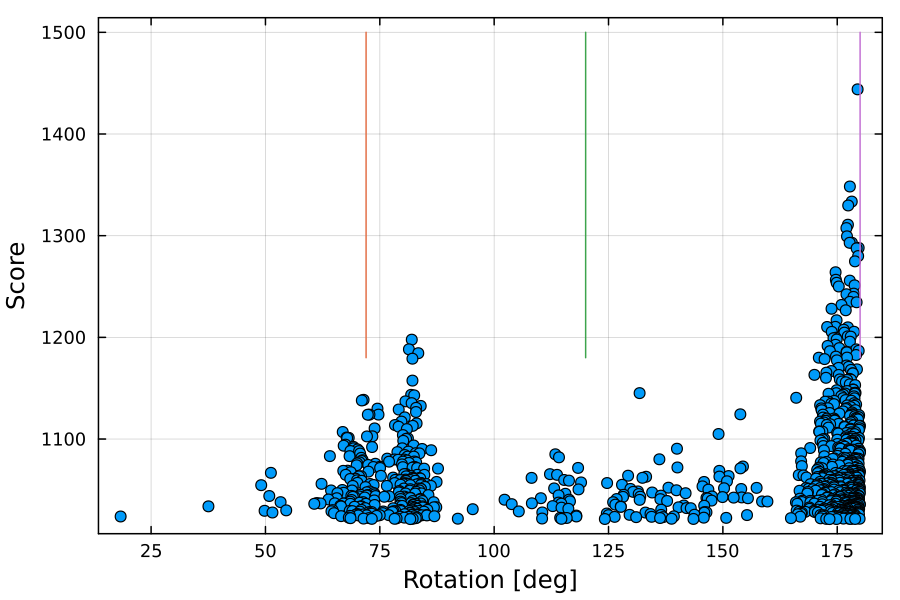

In [5]:
#pyplot()
plot(df.phi[1:1000], df.score[1:1000], seriestype=:scatter, dpi=250, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Score")
#s = collect(970:1350)
s = collect(1180:1500)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

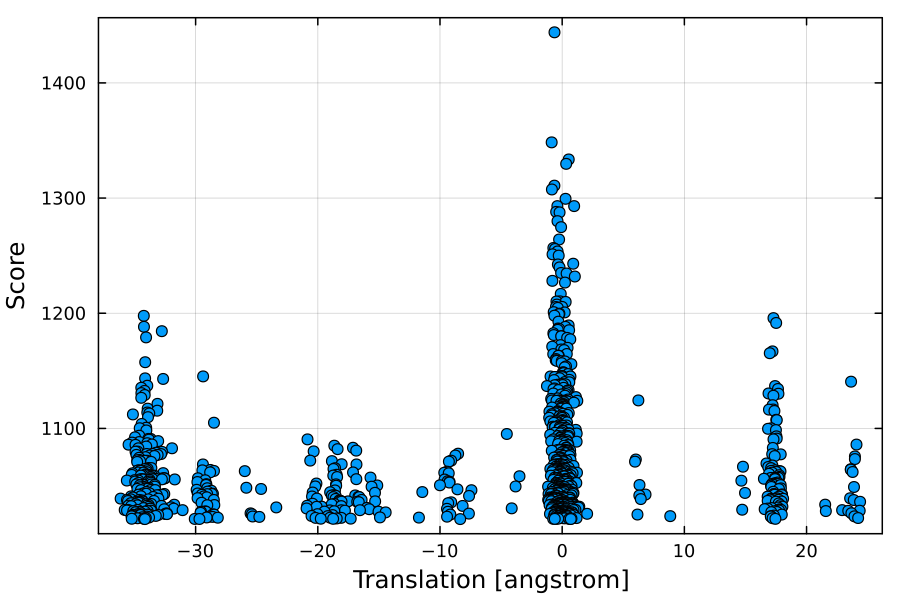

In [6]:
#pyplot()
plot(df.d[1:1000], df.score[1:1000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Translation [angstrom]"); yaxis!("Score")

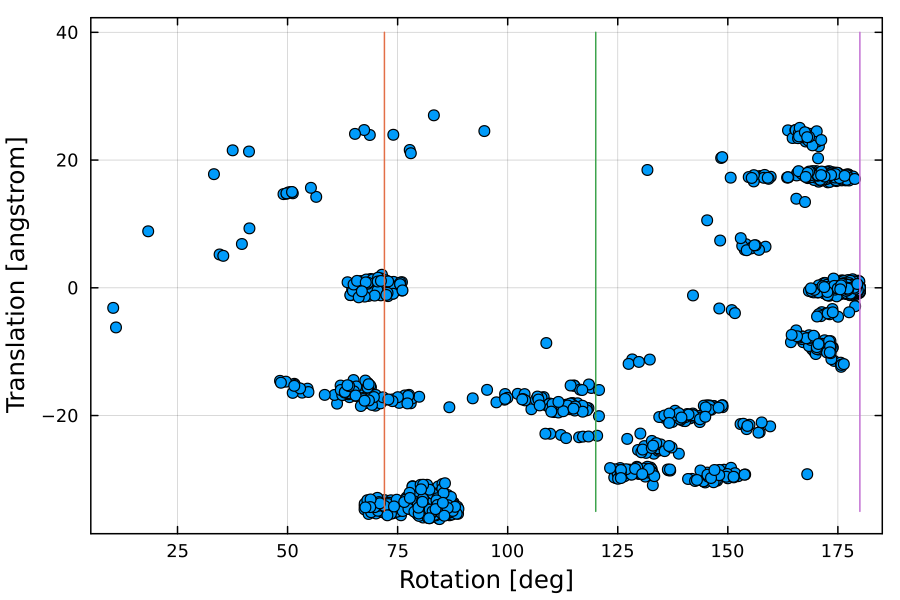

In [7]:
#pyplot()
plot(df.phi[1:2000], df.d[1:2000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Translation [angstrom]")
s = collect(-35:40)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

In [8]:
function create_heatmap(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(20, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = maximum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

create_heatmap (generic function with 1 method)

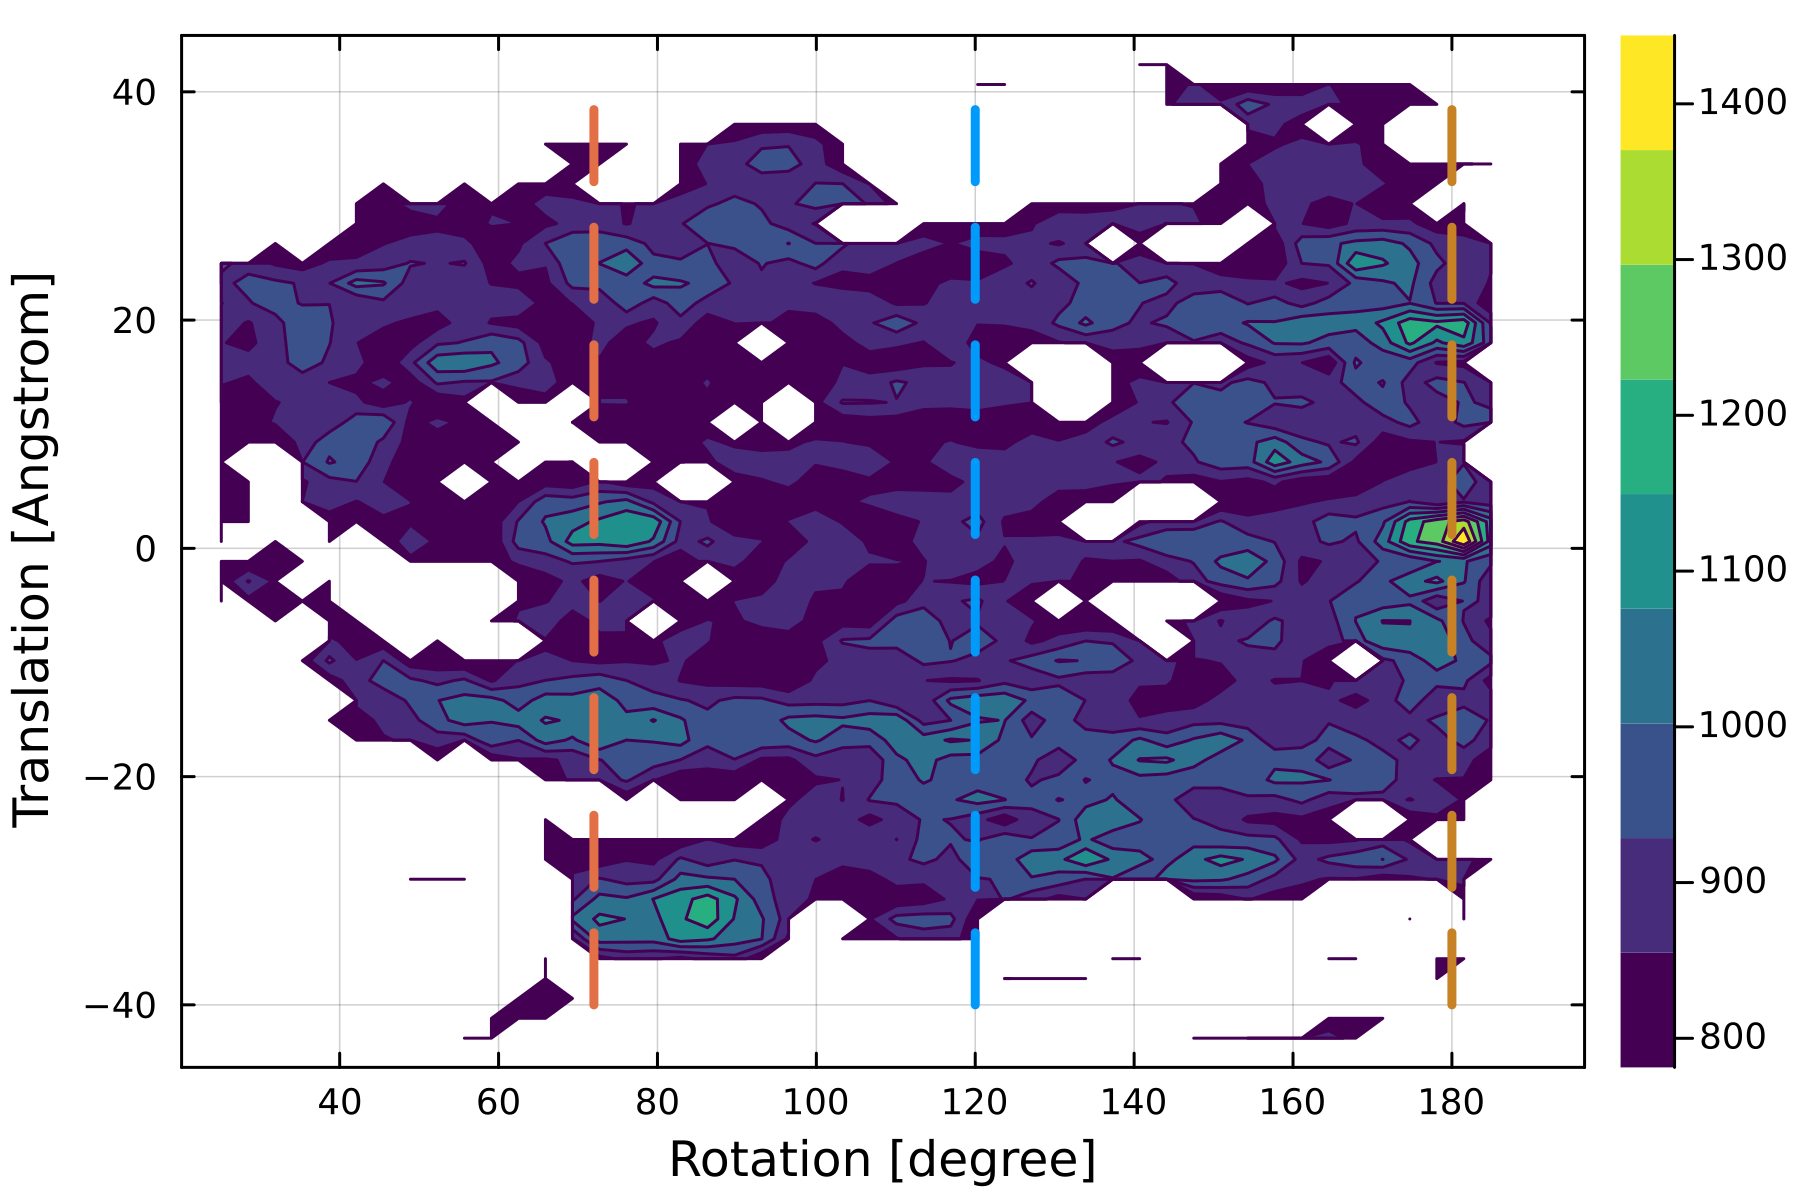

In [23]:
n = 100000
F = create_heatmap(df.phi[1:n], df.d[1:n], df.score[1:n], 50, 50)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:viridis,  
     st=:contourf, levels=range(minimum(F.z[F.z .> -Inf]), maximum(F.z), 10))
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

s = collect(-40:40)
plot!(fill(360/5, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=2, label=nothing)
plot!(fill(360/3, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=1, label=nothing)
plot!(fill(360/2, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=24, label=nothing)

In [24]:
savefig(p, "heatmap_score.png")
savefig(p, "heatmap_score.pdf")

"/data3/yasu/capsid/docking_pairwise/4v4m_zdock_iter/heatmap_score.pdf"

In [11]:
function create_heatmap_min(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(20, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = minimum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

create_heatmap_min (generic function with 1 method)

In [12]:
using Combinatorics

function compute_rmsd_permute(ref, t, nmer)
    natom = Int(t.natom / nmer)
    nmer_ref = Int(ref.natom / natom)
    index_pairs = collect(permutations(1:nmer_ref, nmer))
    rmsd = Inf64
    for index in index_pairs
        id = Vector{Int}(undef, 0)
        for imer = 1:nmer
            id = [id; (natom*(index[imer]-1)+1):(natom * index[imer])]
        end
        ref2 = ref[:, id]
        t2 = superimpose(ref2, t)
        r = compute_rmsd(ref2, t2)
        if r[1] < rmsd
            rmsd = r[1]
        end
    end
    return rmsd
end

compute_rmsd_permute (generic function with 1 method)

In [13]:
t = mdload("ref.pdb")
#t = t["atomname CA"]
ref = t[1, :]
for imer = 2:60
    ref = hcat(ref, t[imer, :])
end
ref

1x11040 TrjArray{Float64, Int64}
| 0                          |  …   0                          |
| 12THR                      |  …   195ALA                     |
| 2CA                        |  …   85321CA                    |
|   -20.55     4.32   -40.02 |  …      61.33    -1.84    26.03 |

In [14]:
function read_ascii(fname)
    lines = readlines(fname)
    natom = length(lines) - 1
    xyz = zeros(Float64, 1, natom*3)
    for i = 1:natom
        xyz[1, 3*(i-1)+1] = parse(Float64, lines[i+1][31:38])
        xyz[1, 3*(i-1)+2] = parse(Float64, lines[i+1][39:46])
        xyz[1, 3*(i-1)+3] = parse(Float64, lines[i+1][47:54])
    end
    TrjArray(xyz=xyz)
end

read_ascii (generic function with 1 method)

In [19]:
ntop = 3000
rmsd = zeros(Float64, ntop)
t = mdload("1/complex.1.pdb")
id = select_atom(t, "atomname CA")

for i in 1:ntop
    filename = df.fnames[i]
    t = read_ascii(filename)
    t_ca = t[:, id]
    rmsd[i] = compute_rmsd_permute(ref, t_ca, 2)
end

More than 50 iterations needed!

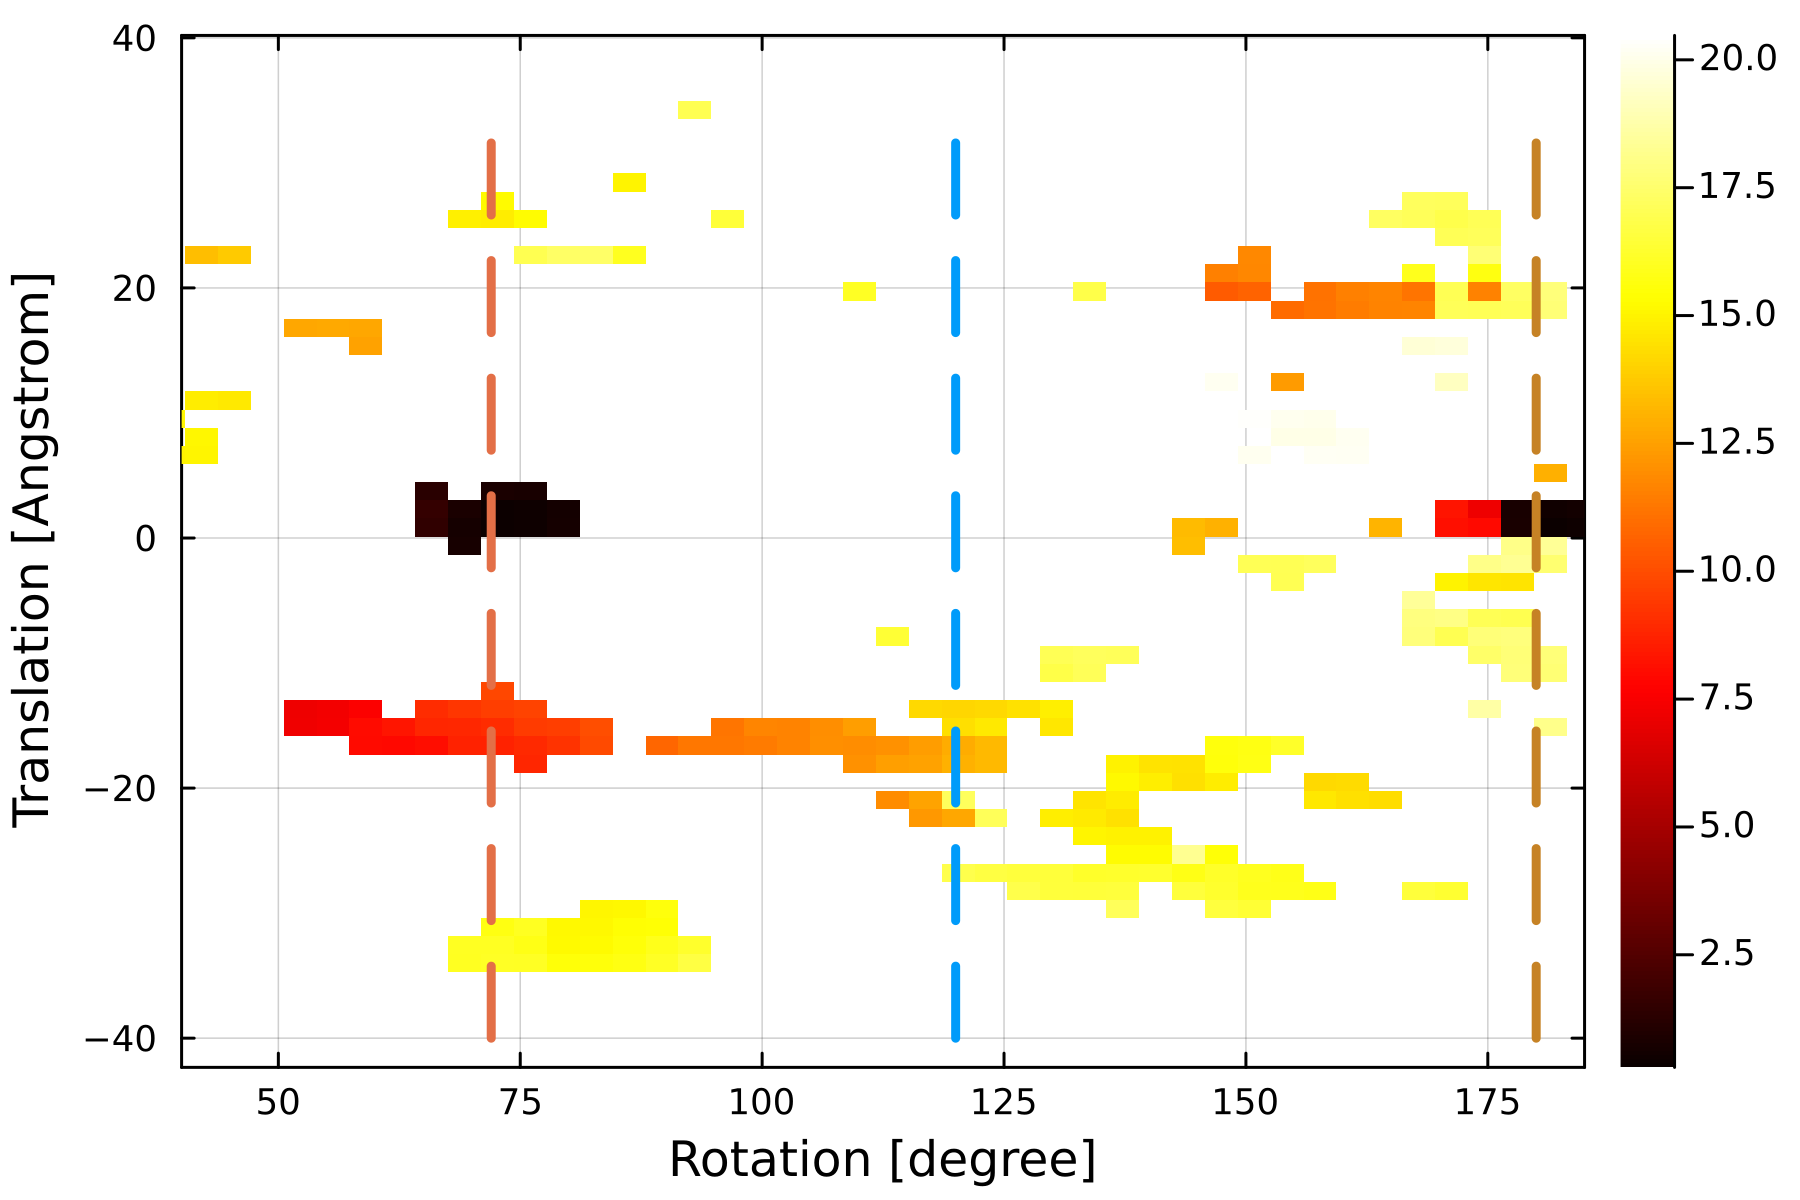

In [27]:
F = create_heatmap_min(df.phi[1:ntop], df.d[1:ntop], rmsd[1:ntop], 50, 50)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:hot,  
     st=:heatmap, levels=range(0, maximum(F.z), 10), xlim=(40, 185))
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

s = collect(-40:35)
plot!(fill(360/5, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=2, label=nothing)
plot!(fill(360/3, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=1, label=nothing)
plot!(fill(360/2, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=24, label=nothing)

In [28]:
savefig(p, "heatmap_rmsd.png")
savefig(p, "heatmap_rmsd.pdf")

"/data3/yasu/capsid/docking_pairwise/4v4m_zdock_iter/heatmap_rmsd.pdf"

In [22]:
using JLD2

save("rmsd.jld2", "rmsd", rmsd)